# (1) business understanding

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline

In [3]:
# Einlesen der csv-Datei

immo = pd.read_csv("King_County_House_prices_dataset.csv")


In [30]:
immo.shape

(21597, 22)

In [31]:
immo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  int64  
 1   date              21597 non-null  object 
 2   price             21597 non-null  float64
 3   bedrooms          21597 non-null  int64  
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  int64  
 6   sqft_lot          21597 non-null  int64  
 7   floors            21597 non-null  float64
 8   waterfront        21597 non-null  float64
 9   view              21597 non-null  float64
 10  condition         21597 non-null  int64  
 11  grade             21597 non-null  int64  
 12  sqft_above        21597 non-null  int64  
 13  sqft_basement     21597 non-null  int64  
 14  yr_built          21597 non-null  int64  
 15  yr_renovated      17755 non-null  float64
 16  zipcode           21597 non-null  int64 

In [59]:
# Ausgabe der wichtigsten beschreibenden statistischen Werte via describe()

immo.describe().round(0).T


,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1000102.0,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402970e+05,3.673680e+05,78000.0,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.000000e+00,1.000000e+00,1.0,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.000000e+00,1.000000e+00,0.0,2.000000e+00,2.000000e+00,2.000000e+00,8.000000e+00
sqft_living,21597.0,2.080000e+03,9.180000e+02,370.0,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509900e+04,4.141300e+04,520.0,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.000000e+00,1.000000e+00,1.0,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
waterfront,21597.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,0.000000e+00,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.000000e+00,1.000000e+00,1.0,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


# (2) data mining

In [47]:
immo.sort_values(["price"],ascending=False).head(50).T


,7245,3910,9245,4407,1446,1313,1162,8085,2624,8629,...,16955,7306,300,656,15244,2897,11245,11963,21514,20309
id,6762700020,9808700762,9208900037,2470100110,8907500070,7558700030,1247600105,1924059029,7738500731,3835500195,...,3025059093,4131900066,3225069065,3760500116,1732800780,9808100100,3761100045,1118000340,8964800330,518500480
date,10/13/2014,6/11/2014,9/19/2014,8/4/2014,4/13/2015,4/13/2015,10/20/2014,6/17/2014,8/15/2014,6/18/2014,...,7/29/2014,8/25/2014,6/24/2014,11/20/2014,2/12/2015,2/2/2015,6/18/2014,4/8/2015,4/7/2015,8/11/2014
price,7.7e+06,7.06e+06,6.89e+06,5.57e+06,5.35e+06,5.3e+06,5.11e+06,4.67e+06,4.5e+06,4.49e+06,...,3.1e+06,3.1e+06,3.08e+06,3.07e+06,3.07e+06,3e+06,3e+06,3e+06,3e+06,3e+06
bedrooms,6,5,6,5,5,6,5,5,5,4,...,5,3,4,3,5,5,4,5,4,3
bathrooms,8,4.5,7.75,5.75,5,6,5.25,6.75,5.5,3,...,5.25,3,5,2.5,3,3.25,4.25,3.75,3.75,3.5
sqft_living,12050,10040,9890,9200,8000,7390,8010,9640,6640,6430,...,5090,3920,4550,3930,4150,5370,4850,4590,5090,4410
sqft_lot,27600,37325,31374,35069,23985,24829,45517,13068,40014,27517,...,23669,13085,18641,55867,7500,14091,12445,11265,14823,10756
floors,2.5,2,2,2,2,2,2,1,2,2,...,2,2,1,1,2.5,2,2,2,1,2
waterfront,0,1,0,0,0,1,1,1,1,0,...,0,1,1,1,0,0,1,0,0,1
view,3,2,4,0,4,0,4,4,4,0,...,0,4,4,4,4,0,4,0,0,4


In [39]:
immo_top50=immo.sort_values(["price"],ascending=False).head(50)

In [85]:
immo_diff=-immo.describe()+immo_top50.describe()
immo_diff[['sqft_living','sqft_lot','bathrooms','bedrooms','floors','view','condition','grade']]


,sqft_living,sqft_lot,bathrooms,bedrooms,floors,view,condition,grade
count,-21547.000000,-2.154700e+04,-21547.000000,-21547.000000,-21547.000000,-21547.000000,-21547.000000,-21547.000000
mean,4036.078150,7.514091e+03,2.309174,1.186800,0.375904,2.246819,0.050175,3.722085
std,900.695633,-2.891102e+04,0.510016,0.237088,0.011846,1.045052,0.025880,-0.165272
min,3550.000000,6.980000e+03,1.250000,1.000000,0.000000,0.000000,2.000000,5.000000
25%,3385.000000,8.032250e+03,1.750000,1.000000,1.000000,0.000000,0.000000,4.000000
50%,3575.000000,1.150800e+04,2.000000,2.000000,0.500000,4.000000,0.000000,4.000000
75%,4522.500000,1.727350e+04,2.687500,1.000000,0.000000,4.000000,0.000000,4.000000
max,-1490.000000,-1.594750e+06,0.000000,-25.000000,0.000000,0.000000,0.000000,0.000000


In [82]:
abs(immo_diff.iloc[2,:]/immo_diff.iloc[1,:])*100

id                  616.553130
price                21.971088
bedrooms             19.977093
bathrooms            22.086516
sqft_living          22.316110
sqft_lot            384.757349
floors                3.151259
waterfront           96.824576
view                 46.512492
condition            51.579009
grade                 4.440305
sqft_above           25.894179
sqft_basement        54.385812
yr_built             42.798054
yr_renovated        135.884830
zipcode              10.933794
lat                 144.007495
long                499.429503
sqft_livingneigh      2.116286
sqft_lotneigh       276.831522
basement             20.726010
dtype: float64

In [53]:
immo_top50[['lat','long']]


,lat,long
7245,47.6298,-122.323
3910,47.6500,-122.214
9245,47.6305,-122.240
4407,47.6289,-122.233
1446,47.6232,-122.220
1313,47.5631,-122.210
1162,47.6767,-122.211
8085,47.5570,-122.210
2624,47.7493,-122.280
8629,47.6208,-122.219


In [335]:
max_long=immo.max()['long']
max_lat=immo.max()['lat']

In [338]:
#Story: die Kinder wollen am Wasser wohnen
immo_water=immo.query('waterfront==1 and bedrooms>=3')
immo_water.groupby(["bathrooms","bedrooms"]).price.mean()

bathrooms  bedrooms
1.0        4           5.150000e+05
2.0        3           1.303000e+06
           4           1.545367e+06
           5           1.629990e+06
3.0        3           1.756750e+06
           4           2.317000e+06
           5           2.700000e+06
           6           9.750000e+05
4.0        3           2.165000e+06
           4           2.617500e+06
           5           2.751250e+06
           6           1.900000e+06
5.0        4           3.080000e+06
           5           3.536667e+06
           6           3.650000e+06
6.0        5           4.500000e+06
           6           5.300000e+06
7.0        5           4.670000e+06
Name: price, dtype: float64

In [281]:
immo_water[['m2_living','m2_lot','bedrooms','bathrooms','floors','yr_built','grade','condition','price']].sort_values(["price"],ascending=False).head(50)

,m2_living,m2_lot,bedrooms,bathrooms,floors,yr_built,grade,condition,price
3910,932.738759,3467.577109,5,4.0,2.0,1940,11,3,7060000.0
1313,686.547752,2306.670383,6,6.0,2.0,1991,12,4,5300000.0
1162,744.147157,4228.632479,5,5.0,2.0,1999,12,3,5110000.0
8085,895.577852,1214.046823,5,7.0,1.0,1983,12,3,4670000.0
2624,616.871052,3717.391304,5,6.0,2.0,2004,12,3,4500000.0
2083,536.046080,1978.818283,4,4.0,2.0,1980,11,4,3850000.0
6502,509.104422,1802.396878,6,5.0,1.5,1936,11,5,3650000.0
15241,448.717949,2067.725753,4,3.0,2.0,1990,11,4,3640000.0
2862,466.369379,1154.868079,3,3.0,2.0,1941,10,3,3600000.0
21560,450.575994,983.277592,5,4.0,2.0,2007,10,3,3570000.0


In [274]:
immo_water.describe().round(0)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_livingneigh,sqft_lotneigh,basement,basement_gr,basement_sm,m2_living
count,1.140000e+02,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,...,94.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0,114.0
mean,4.530199e+09,1946065.0,4.0,3.0,3626.0,27438.0,2.0,1.0,4.0,4.0,...,444.0,98093.0,48.0,-122.0,2885.0,23229.0,1.0,0.0,0.0,337.0
std,2.804570e+09,1158937.0,1.0,1.0,1565.0,49869.0,1.0,0.0,1.0,1.0,...,833.0,62.0,0.0,0.0,740.0,24623.0,0.0,1.0,1.0,145.0
min,1.210391e+08,340000.0,3.0,1.0,1200.0,1989.0,1.0,1.0,0.0,2.0,...,0.0,98004.0,47.0,-123.0,1170.0,3230.0,0.0,0.0,0.0,111.0
25%,2.172037e+09,1025000.0,3.0,2.0,2602.0,11868.0,1.0,1.0,4.0,3.0,...,0.0,98040.0,47.0,-122.0,2362.0,12139.0,0.0,0.0,0.0,242.0
50%,3.761100e+09,1700000.0,4.0,3.0,3210.0,18013.0,2.0,1.0,4.0,3.0,...,0.0,98074.0,48.0,-122.0,2870.0,16641.0,1.0,0.0,0.0,298.0
75%,7.351950e+09,2590000.0,4.0,4.0,4402.0,26026.0,2.0,1.0,4.0,4.0,...,0.0,98153.0,48.0,-122.0,3405.0,24288.0,1.0,1.0,1.0,409.0
max,9.808701e+09,7060000.0,6.0,7.0,10040.0,505166.0,3.0,1.0,4.0,5.0,...,2009.0,98199.0,48.0,-122.0,4913.0,192268.0,1.0,1.0,1.0,933.0


# (3) data cleaning

In [189]:
# Datenbereinigung column date

pd.to_datetime(immo.date)

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [190]:
# Datenbereinigung column sqft_basement

immo["sqft_basement"]=immo["sqft_living"]-immo["sqft_above"]

In [191]:
# Datenbereinigung column waterfront

immo.waterfront.fillna(0,inplace=True)


In [192]:
# Datenbereinigung column view

immo.view.fillna(0,inplace=True)

In [279]:
# Umrechnung in Quadratmeter

immo["m2_living"]=immo["sqft_living"].apply(lambda x: x/10.764)
immo["m2_lot"]=immo["sqft_lot"].apply(lambda x: x/10.764)


## (4) Data Analyse

## Untersuchung der Eigenschaft sqft_basement

In [244]:
immo_base=immo_water.query("sqft_basement >0")
immo_base.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_livingneigh,sqft_lotneigh,basement
count,7.900000e+01,79.00,79.00,79.00,79.00,79.00,79.00,79.0,79.00,79.00,...,79.00,79.00,79.00,65.00,79.00,79.00,79.00,79.00,79.00,79.0
mean,4.663142e+09,2029379.75,3.77,3.00,3833.91,28105.68,1.54,1.0,3.71,3.57,...,2609.10,1224.81,1964.61,459.55,98091.71,47.55,-122.26,2915.73,22733.27,1.0
std,2.905466e+09,1268140.54,0.83,1.19,1675.23,58123.59,0.51,0.0,0.75,0.75,...,1263.58,727.11,26.94,845.57,63.61,0.11,0.11,769.26,26433.94,0.0
min,1.210391e+08,380000.00,3.00,1.00,1460.00,5575.00,1.00,1.0,0.00,2.00,...,1100.00,100.00,1912.00,0.00,98004.00,47.33,-122.51,1170.00,5575.00,1.0
25%,2.472529e+09,997000.00,3.00,2.00,2771.50,12184.50,1.00,1.0,4.00,3.00,...,1635.00,800.00,1947.50,0.00,98034.00,47.49,-122.33,2370.00,12074.50,1.0
50%,3.761100e+09,1850000.00,4.00,3.00,3490.00,17826.00,1.50,1.0,4.00,3.00,...,2260.00,1190.00,1962.00,0.00,98074.00,47.56,-122.25,2980.00,15929.00,1.0
75%,7.599400e+09,2700000.00,4.00,4.00,4485.00,24760.00,2.00,1.0,4.00,4.00,...,3410.00,1570.00,1983.50,0.00,98150.50,47.63,-122.20,3450.00,22017.50,1.0
max,9.808701e+09,7060000.00,6.00,7.00,10040.00,505166.00,3.00,1.0,4.00,5.00,...,7680.00,4820.00,2014.00,2009.00,98198.00,47.76,-122.07,4913.00,192268.00,1.0


In [245]:
immo_nobase=immo_water.query("sqft_basement == 0")
immo_nobase.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_livingneigh,sqft_lotneigh,basement
count,3.500000e+01,35.00,35.00,35.00,35.00,35.00,35.00,35.0,35.00,35.00,...,35.00,35.0,35.00,29.00,35.00,35.00,35.00,35.00,35.00,35.0
mean,4.230128e+09,1758012.86,3.74,2.74,3155.69,25930.17,1.99,1.0,3.91,3.37,...,3155.69,0.0,1968.63,409.83,98095.46,47.55,-122.26,2816.57,24348.34,0.0
std,2.577111e+09,849741.99,0.92,0.85,1174.11,22617.02,0.46,0.0,0.28,0.60,...,1174.11,0.0,26.63,816.63,59.15,0.10,0.11,675.84,20251.89,0.0
min,3.331003e+08,340000.00,3.00,1.00,1200.00,1989.00,1.00,1.0,3.00,3.00,...,1200.00,0.0,1925.00,0.00,98006.00,47.33,-122.44,1630.00,3230.00,0.0
25%,2.019436e+09,1150000.00,3.00,2.00,2400.00,10304.50,2.00,1.0,4.00,3.00,...,2400.00,0.0,1947.00,0.00,98040.00,47.48,-122.36,2425.00,12214.50,0.0
50%,3.623500e+09,1700000.00,3.00,3.00,2830.00,18226.00,2.00,1.0,4.00,3.00,...,2830.00,0.0,1974.00,0.00,98075.00,47.56,-122.26,2810.00,18782.00,0.0
75%,6.613751e+09,2065000.00,4.50,3.00,3875.50,31900.00,2.00,1.0,4.00,4.00,...,3875.50,0.0,1992.00,0.00,98150.50,47.61,-122.20,3130.00,27703.50,0.0
max,9.201300e+09,3850000.00,6.00,4.00,5770.00,91681.00,3.00,1.0,4.00,5.00,...,5770.00,0.0,2007.00,2001.00,98199.00,47.75,-122.06,4620.00,104374.00,0.0


In [194]:
import statsmodels.api as sms
import statsmodels.api as sm
import seaborn as sns

### Analysis of Column sqft_living
sqft_above muss nicht beachtet werden, da redundant


In [295]:
size_bins = np.arange(0, 14000,1000)
size_series = pd.cut(immo['sqft_living'], bins=size_bins, 
                              labels=size_bins[:-1])
size_series.name = 'size_bin'
immo_df = pd.concat([immo, size_series], axis=1)

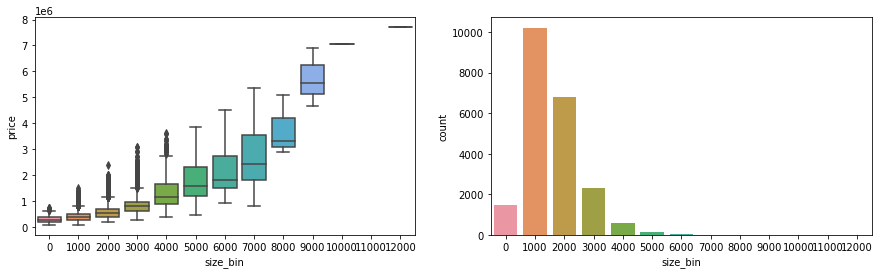

In [296]:

fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='size_bin',data=immo_df,ax=ax[1])
sns.boxplot(x='size_bin', y='price', data=immo_df,ax=ax[0])
plt.show()

In [298]:
pd.pivot_table(immo_df, values='price', index=['grade'], columns='size_bin',margins=True)
               

size_bin,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,12000,All
grade,,,,,,,,,,,,,
3,262000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.620000e+05
4,211309.615385,230000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.120019e+05
5,234312.847682,271795.122222,3.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.485240e+05
6,275697.690289,312620.938397,3.816223e+05,3.898000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.019166e+05
7,352599.854331,380821.764725,4.714194e+05,5.673301e+05,6.502444e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.025946e+05
8,351660.526316,474500.907615,5.688765e+05,6.901206e+05,9.860556e+05,8.849000e+05,NaN,NaN,NaN,NaN,NaN,NaN,5.429868e+05
9,345000.000000,608193.173267,7.038820e+05,8.755410e+05,1.074193e+06,1.167455e+06,1.035000e+06,NaN,NaN,NaN,NaN,NaN,7.737382e+05
10,NaN,627463.375000,9.038236e+05,1.023319e+06,1.325186e+06,1.657571e+06,1.585000e+06,NaN,NaN,NaN,NaN,NaN,1.072347e+06
11,NaN,NaN,1.146389e+06,1.199440e+06,1.523990e+06,1.815944e+06,2.011579e+06,1.182500e+06,3.300000e+06,NaN,7060000.0,NaN,1.497792e+06


In [ ]:
pd.pivot_table(immo_df, values='sqft_living', index='grade', columns='size_bin',margins=True)


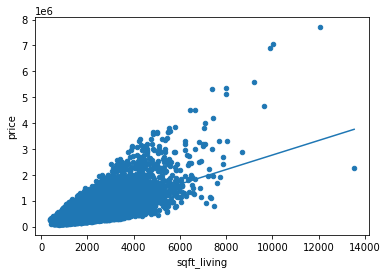

In [195]:
immo.plot(x='sqft_living',y='price',kind='scatter')
plt.plot(np.unique(immo.sqft_living), np.poly1d(np.polyfit(immo.sqft_living, immo.price, 1))(np.unique(immo.sqft_living)));

### Analysis of Column bathroom

In [196]:
immo['bathrooms'].round(0).value_counts()

2.0    13847
1.0     3931
3.0     2527
4.0     1201
5.0       57
6.0       24
8.0        4
0.0        4
7.0        2
Name: bathrooms, dtype: int64

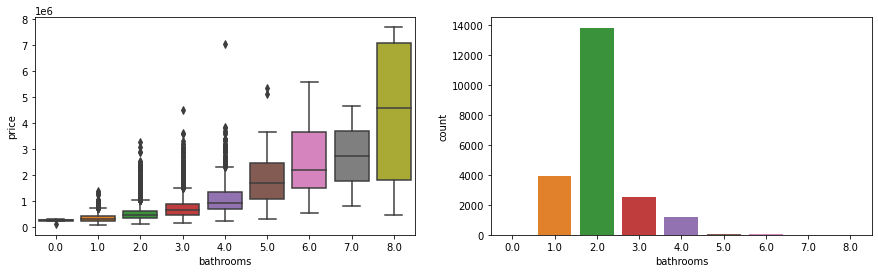

In [197]:
immo['bathrooms']=immo['bathrooms'].round(0)
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='bathrooms',data=immo,ax=ax[1])
sns.boxplot(x='bathrooms', y='price', data=immo,ax=ax[0])
plt.show()

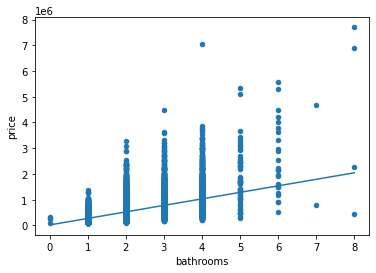

In [198]:
immo.plot(x='bathrooms',y='price',kind='scatter')
plt.plot(np.unique(immo.bathrooms), np.poly1d(np.polyfit(immo.bathrooms, immo.price, 1))(np.unique(immo.bathrooms)));

### Analysis of Column bedrooms



In [199]:
immo['bedrooms'].round(0).value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

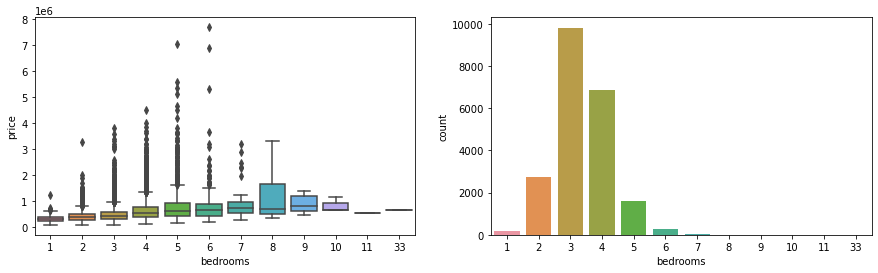

In [200]:
immo['bedrooms']=immo['bedrooms'].round(0)
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='bedrooms',data=immo,ax=ax[1])
sns.boxplot(x='bedrooms', y='price', data=immo,ax=ax[0])
plt.show()

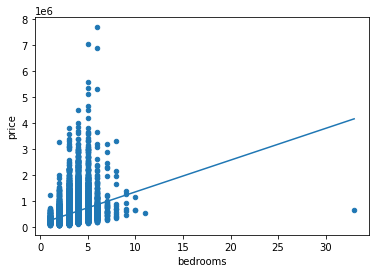

In [201]:
immo.plot(x='bedrooms',y='price',kind='scatter')
plt.plot(np.unique(immo.bedrooms), np.poly1d(np.polyfit(immo.bedrooms, immo.price, 1))(np.unique(immo.bedrooms)));

### Analysis of Column floor

In [202]:
immo['floors'].round(0).value_counts()

1.0    10673
2.0    10306
3.0      611
4.0        7
Name: floors, dtype: int64

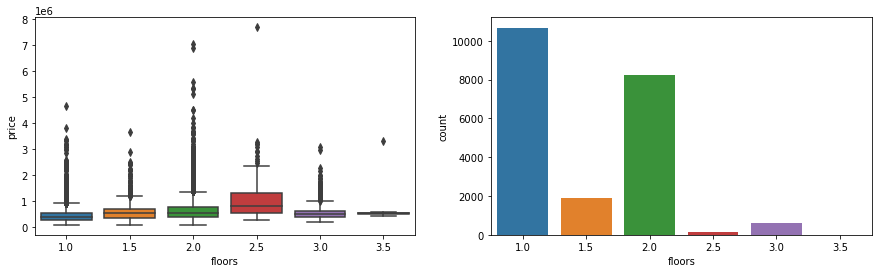

In [203]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='floors',data=immo,ax=ax[1])
sns.boxplot(x='floors', y='price', data=immo,ax=ax[0])
plt.show()

### Analysis of Column view


In [204]:
immo['view'].round(0).value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

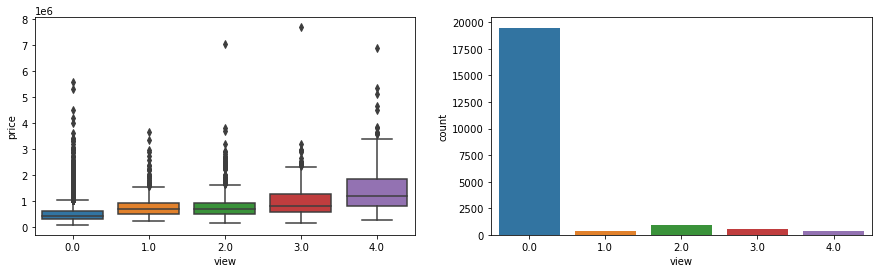

In [205]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='view',data=immo,ax=ax[1])
sns.boxplot(x='view', y='price', data=immo,ax=ax[0])
plt.show()

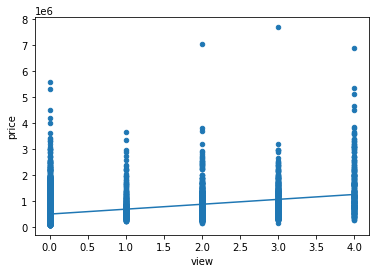

In [206]:
immo.plot(x='view',y='price',kind='scatter')
plt.plot(np.unique(immo.view), np.poly1d(np.polyfit(immo.view, immo.price, 1))(np.unique(immo.view)))

### Analysis of Column condition


In [207]:


immo['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [208]:
import seaborn as sns

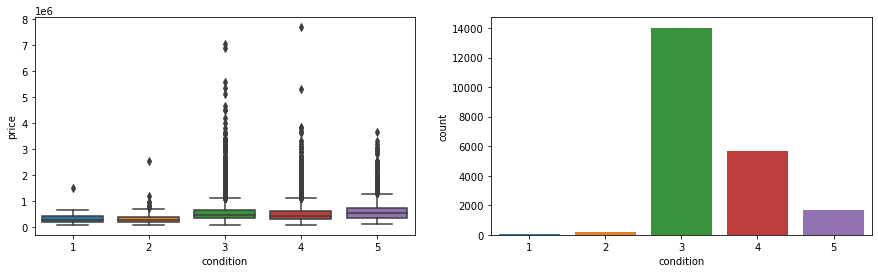

In [209]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='condition',data=immo,ax=ax[1])
sns.boxplot(x='condition', y='price', data=immo,ax=ax[0])
plt.show()

## Analysis of Column grade


In [221]:
immo.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

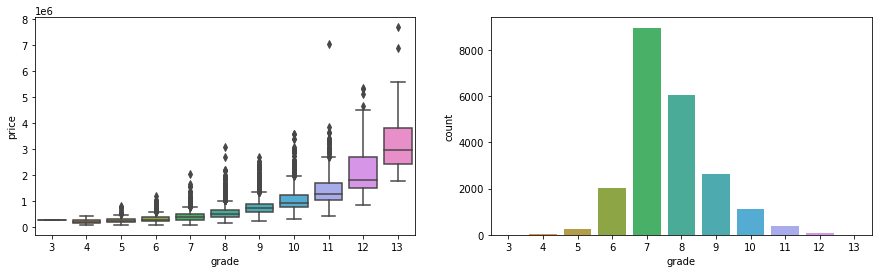

In [122]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='grade',data=immo,ax=ax[1])
sns.boxplot(x='grade', y='price', data=immo,ax=ax[0])
plt.show()

## Analysis of column yr_built


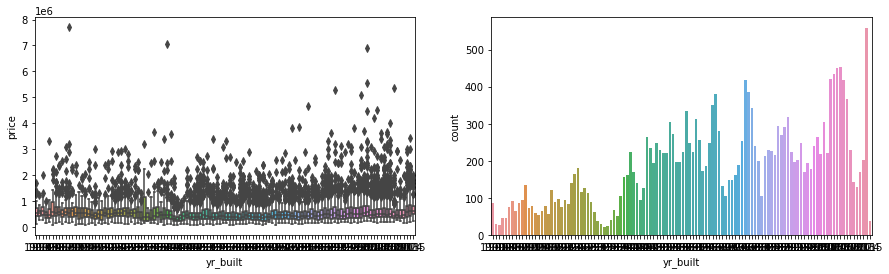

In [264]:
fig,ax=plt.subplots(ncols=2,figsize=(15,4))
sns.countplot(x='yr_built',data=immo,ax=ax[1])
sns.boxplot(x='yr_built', y='price', data=immo,ax=ax[0])
plt.show()

## Analysis of column sqft_basement

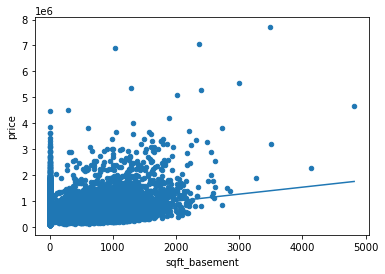

In [265]:
immo.plot(x='sqft_basement',y='price',kind='scatter')
plt.plot(np.unique(immo.sqft_basement), np.poly1d(np.polyfit(immo.sqft_basement, immo.price, 1))(np.unique(immo.sqft_basement)));

# (5) feature engineering


In [123]:
# Einführung einer neuen Spalte Basement mit Ausprägungen 0/1
immo["basement"]=immo["sqft_basement"].apply(lambda x: 1 if x>0 else 0)

In [256]:
immo["basement_gr"]=immo["sqft_basement"].apply(lambda x: 1 if x>800 else 0)


In [260]:
immo["basement_sm"]=immo["sqft_basement"].apply(lambda x: 1 if x<=800 else 0)


In [305]:
immo["bathrooms_gr3"]=immo["bathrooms"].apply(lambda x: 1 if x>3 else 0)

In [320]:
immo["bathrooms_gr2"]=immo["bathrooms"].apply(lambda x: 1 if x>2 else 0)

In [337]:
immo["bathrooms_sm2"]=immo["bathrooms"].apply(lambda x: 1 if x<=2 else 0)

# (6) predictive modelling


In [326]:
X2 = immo_water[['bedrooms','bathrooms','floors','sqft_living','sqft_livingneigh','grade','view','lat','long']]
        
X2 = sm.add_constant(X2)
y = immo_water.price

In [333]:
# Create an OLS model
model = sms.OLS(y, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1149.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:54:04   Log-Likelihood:            -2.9401e+05
No. Observations:               21597   AIC:                         5.881e+05
Df Residuals:                   21550   BIC:                         5.885e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.394e+07   1.37e+06    -39.311      0.000   -5.66e+07   -5.12e+07
sqft_living        134.9116      3.353     40.233      0.000     128.339     141.484
sqft_livingneigh    39.3827      3.425     11.498      0.000      32.669      46.096
lat               6.161e+05   1.01e+04     60.881      0.000    5.96e+05    6.36e+05
long              -2.03e+05   1.08e+04    -18.731      0.000   -2.24e+05   -1.82e+05
fl_1.5            2.805e+04   2509.222     11.179      0.000    2.31e+04     3.3e+04
fl_1.5            2.805e+04   2509.222     11.179      0.000    2.31e+04     3.3e+04
fl_2.0             826.6539   1815.906      0.455      0.649   -2732.656    4385.964
fl_2.0             826.6539   1815.906      0.455      0.649   -2732.656    4385.964
fl_2.5            8.304e+04   8025.601     10.347      0.000    6.73e+04    9.88e+04
fl_2.5            8.304e+04   8025.601     10.347      0.000    6.73e+04    9.88e+04
fl_3.0           -1781.9102   4427.657     -0.402      0.687   -1.05e+04    6896.625
fl_3.0           -1781.9102   4427.657     -0.402      0.687   -1.05e+04    6896.625
fl_3.5            5.852e+04   3.77e+04      1.552      0.121   -1.54e+04    1.32e+05
fl_3.5            5.852e+04   3.77e+04      1.552      0.121   -1.54e+04    1.32e+05
gr_4             -1.093e+05   1.01e+05     -1.083      0.279   -3.07e+05    8.85e+04
gr_4             -1.093e+05   1.01e+05     -1.083      0.279   -3.07e+05    8.85e+04
gr_5              -1.17e+05   9.94e+04     -1.177      0.239   -3.12e+05    7.79e+04
gr_5              -1.17e+05   9.94e+04     -1.177      0.239   -3.12e+05    7.79e+04
gr_6             -1.152e+05   9.93e+04     -1.160      0.246    -3.1e+05    7.95e+04
gr_6             -1.152e+05   9.93e+04     -1.160      0.246    -3.1e+05    7.95e+04
gr_7             -9.667e+04   9.93e+04     -0.973      0.330   -2.91e+05     9.8e+04
gr_7             -9.667e+04   9.93e+04     -0.973      0.330   -2.91e+05     9.8e+04
gr_8              -6.77e+04   9.93e+04     -0.682      0.496   -2.62e+05    1.27e+05
gr_8              -6.77e+04   9.93e+04     -0.682      0.496   -2.62e+05    1.27e+05
gr_9             -1.329e+04   9.94e+04     -0.134      0.894   -2.08e+05    1.81e+05
gr_9             -1.329e+04   9.94e+04     -0.134      0.894   -2.08e+05    1.81e+05
gr_10             6.389e+04   9.94e+04      0.643      0.521   -1.31e+05    2.59e+05
gr_10             6.389e+04   9.94e+04      0.643      0.521   -1.31e+05    2.59e+05
gr_11             1.733e+05   9.96e+04      1.740      0.082   -2.19e+04    3.68e+05
gr_11             1.733e+05   9.96e+04      1.740      0.082   -2.19e+04    3.68e+05
gr_12             3.694e+05      1e+05      3.691      0.000    1.73e+05    5.66e+05
gr_12             3.694e+05      1e+05      3.691      0.000    1.73e+05    5.66e+05
gr_13             7.963

In [329]:
X2 = immo_water_dum[['sqft_living','sqft_livingneigh','lat','long','fl_1.5', 'fl_2.0', 'fl_2.5', 'fl_3.0', 'fl_3.5', 'gr_4', 'gr_5',
       'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12', 'gr_13',
       'c_2', 'c_3', 'c_4', 'c_5', 'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6',
       'bed_7', 'bed_8', 'bed_9', 'bed_10', 'bed_11', 'bed_33', 'bath_1.0',
       'bath_2.0', 'bath_3.0', 'bath_4.0', 'bath_5.0', 'bath_6.0', 'bath_7.0',
       'bath_8.0', 'v_1.0', 'v_2.0', 'v_3.0', 'v_4.0']]
        
X2 = sm.add_constant(X2)
y = immo_water_dum.price

In [334]:
# Create an OLS model
model = sms.OLS(y, X2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1149.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        14:54:06   Log-Likelihood:            -2.9401e+05
No. Observations:               21597   AIC:                         5.881e+05
Df Residuals:                   21550   BIC:                         5.885e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.394e+07   1.37e+06    -39.311      0.000   -5.66e+07   -5.12e+07
sqft_living        134.9116      3.353     40.233      0.000     128.339     141.484
sqft_livingneigh    39.3827      3.425     11.498      0.000      32.669      46.096
lat               6.161e+05   1.01e+04     60.881      0.000    5.96e+05    6.36e+05
long              -2.03e+05   1.08e+04    -18.731      0.000   -2.24e+05   -1.82e+05
fl_1.5            2.805e+04   2509.222     11.179      0.000    2.31e+04     3.3e+04
fl_1.5            2.805e+04   2509.222     11.179      0.000    2.31e+04     3.3e+04
fl_2.0             826.6539   1815.906      0.455      0.649   -2732.656    4385.964
fl_2.0             826.6539   1815.906      0.455      0.649   -2732.656    4385.964
fl_2.5            8.304e+04   8025.601     10.347      0.000    6.73e+04    9.88e+04
fl_2.5            8.304e+04   8025.601     10.347      0.000    6.73e+04    9.88e+04
fl_3.0           -1781.9102   4427.657     -0.402      0.687   -1.05e+04    6896.625
fl_3.0           -1781.9102   4427.657     -0.402      0.687   -1.05e+04    6896.625
fl_3.5            5.852e+04   3.77e+04      1.552      0.121   -1.54e+04    1.32e+05
fl_3.5            5.852e+04   3.77e+04      1.552      0.121   -1.54e+04    1.32e+05
gr_4             -1.093e+05   1.01e+05     -1.083      0.279   -3.07e+05    8.85e+04
gr_4             -1.093e+05   1.01e+05     -1.083      0.279   -3.07e+05    8.85e+04
gr_5              -1.17e+05   9.94e+04     -1.177      0.239   -3.12e+05    7.79e+04
gr_5              -1.17e+05   9.94e+04     -1.177      0.239   -3.12e+05    7.79e+04
gr_6             -1.152e+05   9.93e+04     -1.160      0.246    -3.1e+05    7.95e+04
gr_6             -1.152e+05   9.93e+04     -1.160      0.246    -3.1e+05    7.95e+04
gr_7             -9.667e+04   9.93e+04     -0.973      0.330   -2.91e+05     9.8e+04
gr_7             -9.667e+04   9.93e+04     -0.973      0.330   -2.91e+05     9.8e+04
gr_8              -6.77e+04   9.93e+04     -0.682      0.496   -2.62e+05    1.27e+05
gr_8              -6.77e+04   9.93e+04     -0.682      0.496   -2.62e+05    1.27e+05
gr_9             -1.329e+04   9.94e+04     -0.134      0.894   -2.08e+05    1.81e+05
gr_9             -1.329e+04   9.94e+04     -0.134      0.894   -2.08e+05    1.81e+05
gr_10             6.389e+04   9.94e+04      0.643      0.521   -1.31e+05    2.59e+05
gr_10             6.389e+04   9.94e+04      0.643      0.521   -1.31e+05    2.59e+05
gr_11             1.733e+05   9.96e+04      1.740      0.082   -2.19e+04    3.68e+05
gr_11             1.733e+05   9.96e+04      1.740      0.082   -2.19e+04    3.68e+05
gr_12             3.694e+05      1e+05      3.691      0.000    1.73e+05    5.66e+05
gr_12             3.694e+05      1e+05      3.691      0.000    1.73e+05    5.66e+05
gr_13             7.963

# Korrelationsanalyse ohne Dummyvariablen

In [311]:
immo.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_livingneigh', 'sqft_lotneigh', 'basement',
       'basement_gr', 'basement_sm', 'm2_living', 'm2_lot', 'bathrooms_gr2',
       'bathrooms_gr3'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

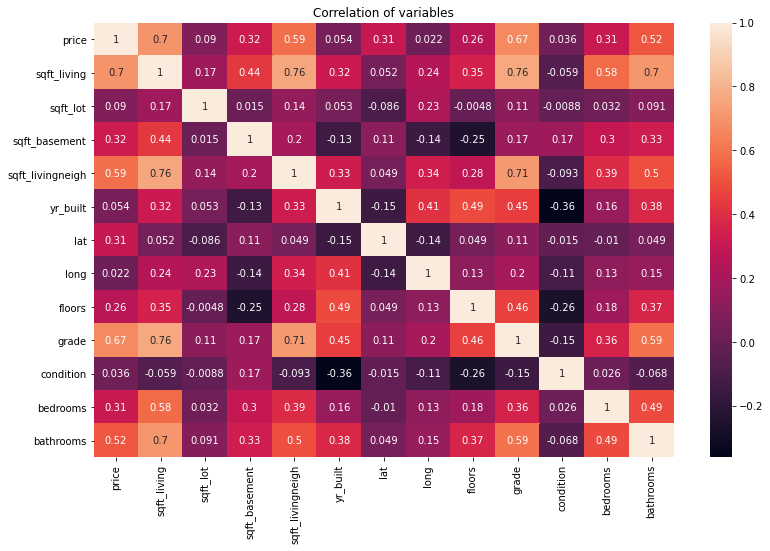

In [312]:
#Korrelationsanalyse
corr = immo[['price','sqft_living','sqft_lot','sqft_basement','sqft_livingneigh','yr_built','lat','long','floors','grade','condition',
       'bedrooms','bathrooms']]
plt.figure(figsize=(13,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)
plt.savefig('correlogram_simple.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

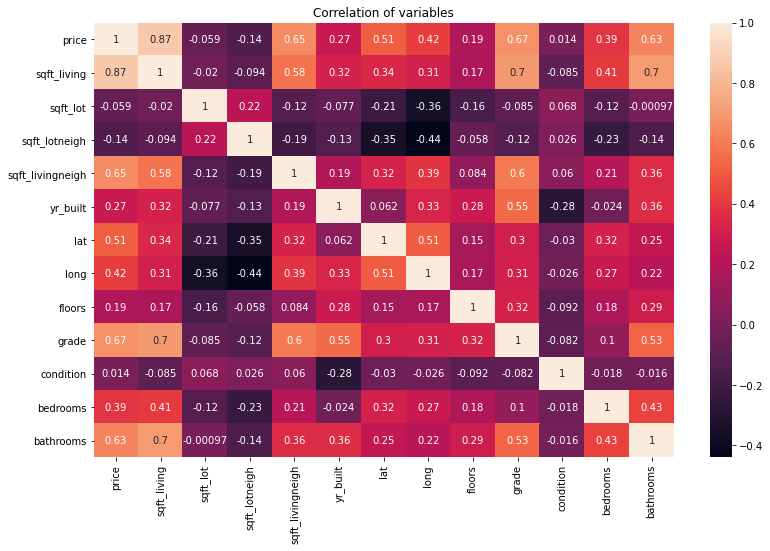

In [313]:
#Korrelationsanalyse für das Dataset immo_water
corr = immo_water[['price','sqft_living','sqft_lot','sqft_lotneigh','sqft_livingneigh','yr_built','lat','long','floors','grade','condition',
       'bedrooms','bathrooms']]
plt.figure(figsize=(13,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)
plt.savefig('correlogram_water_simple.png')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

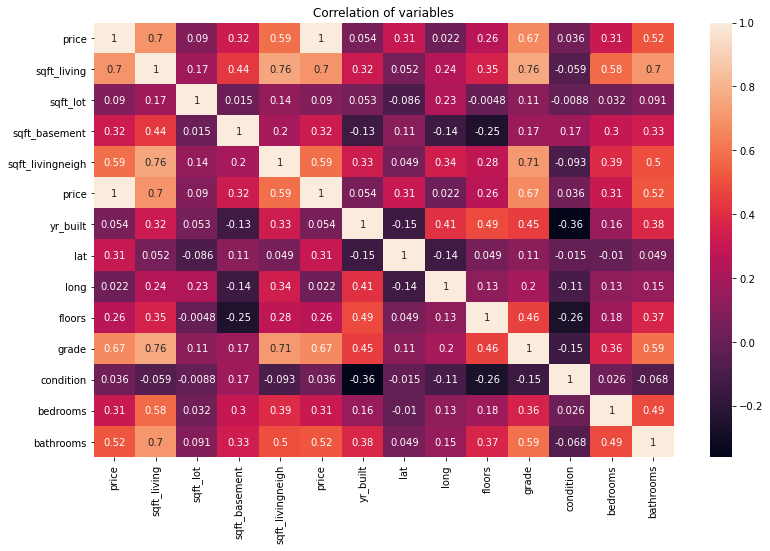

In [314]:
#Korrelationsanalyse für Dataset water
corr = immo[['price','sqft_living','sqft_lot','sqft_basement','sqft_livingneigh','price','yr_built','lat','long','floors','grade','condition',
       'bedrooms','bathrooms']]
plt.figure(figsize=(13,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

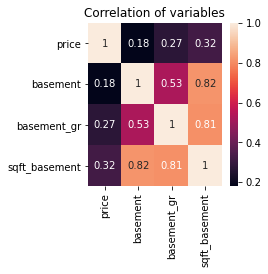

In [339]:
corr = immo[['price','basement','basement_gr','sqft_basement']]
plt.figure(figsize=(3,3))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)
plt.savefig('correlogram_simple.png')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

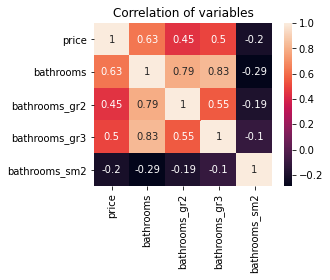

In [336]:
corr = immo_water[['price','bathrooms','bathrooms_gr2','bathrooms_gr3','bathrooms_sm2']]
plt.figure(figsize=(4,3))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)
plt.savefig('correlogram_simple.png')
plt.show

# Korrelationsanalyse mit Dummyvariablen

In [177]:
# Einführung von Dummyvariablen für die Korrelationsanalyse
floors_dummy= pd.get_dummies(immo['floors'], prefix='fl', drop_first=True)
grade_dummy= pd.get_dummies(immo['grade'], prefix='gr', drop_first=True)
condition_dummy=pd.get_dummies(immo['condition'], prefix='c', drop_first=True)
view_dummy=pd.get_dummies(immo['view'], prefix='v', drop_first=True)
bedrooms_dummy=pd.get_dummies(immo['bedrooms'], prefix='bed', drop_first=True)
bathrooms_dummy=pd.get_dummies(immo['bathrooms'], prefix='bath', drop_first=True)


In [178]:
immo_dum = immo.drop(['floors','grade','condition','view','bathrooms','bedrooms'], axis=1)
immo_water_dum=immo_water.drop(['floors','grade','condition','view','bathrooms','bedrooms'], axis=1)

In [179]:
immo_dum = pd.concat([immo_dum,floors_dummy,grade_dummy,condition_dummy,bedrooms_dummy,bathrooms_dummy
                      ,view_dummy], axis=1)
immo_water_dum=pd.concat([immo_dum,floors_dummy,grade_dummy,condition_dummy,bedrooms_dummy,bathrooms_dummy
                      ,view_dummy], axis=1)

In [180]:
immo_dum.columns

Index(['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_livingneigh', 'sqft_lotneigh', 'basement',
       'fl_1.5', 'fl_2.0', 'fl_2.5', 'fl_3.0', 'fl_3.5', 'gr_4', 'gr_5',
       'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12', 'gr_13',
       'c_2', 'c_3', 'c_4', 'c_5', 'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6',
       'bed_7', 'bed_8', 'bed_9', 'bed_10', 'bed_11', 'bed_33', 'bath_1.0',
       'bath_2.0', 'bath_3.0', 'bath_4.0', 'bath_5.0', 'bath_6.0', 'bath_7.0',
       'bath_8.0', 'v_1.0', 'v_2.0', 'v_3.0', 'v_4.0'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

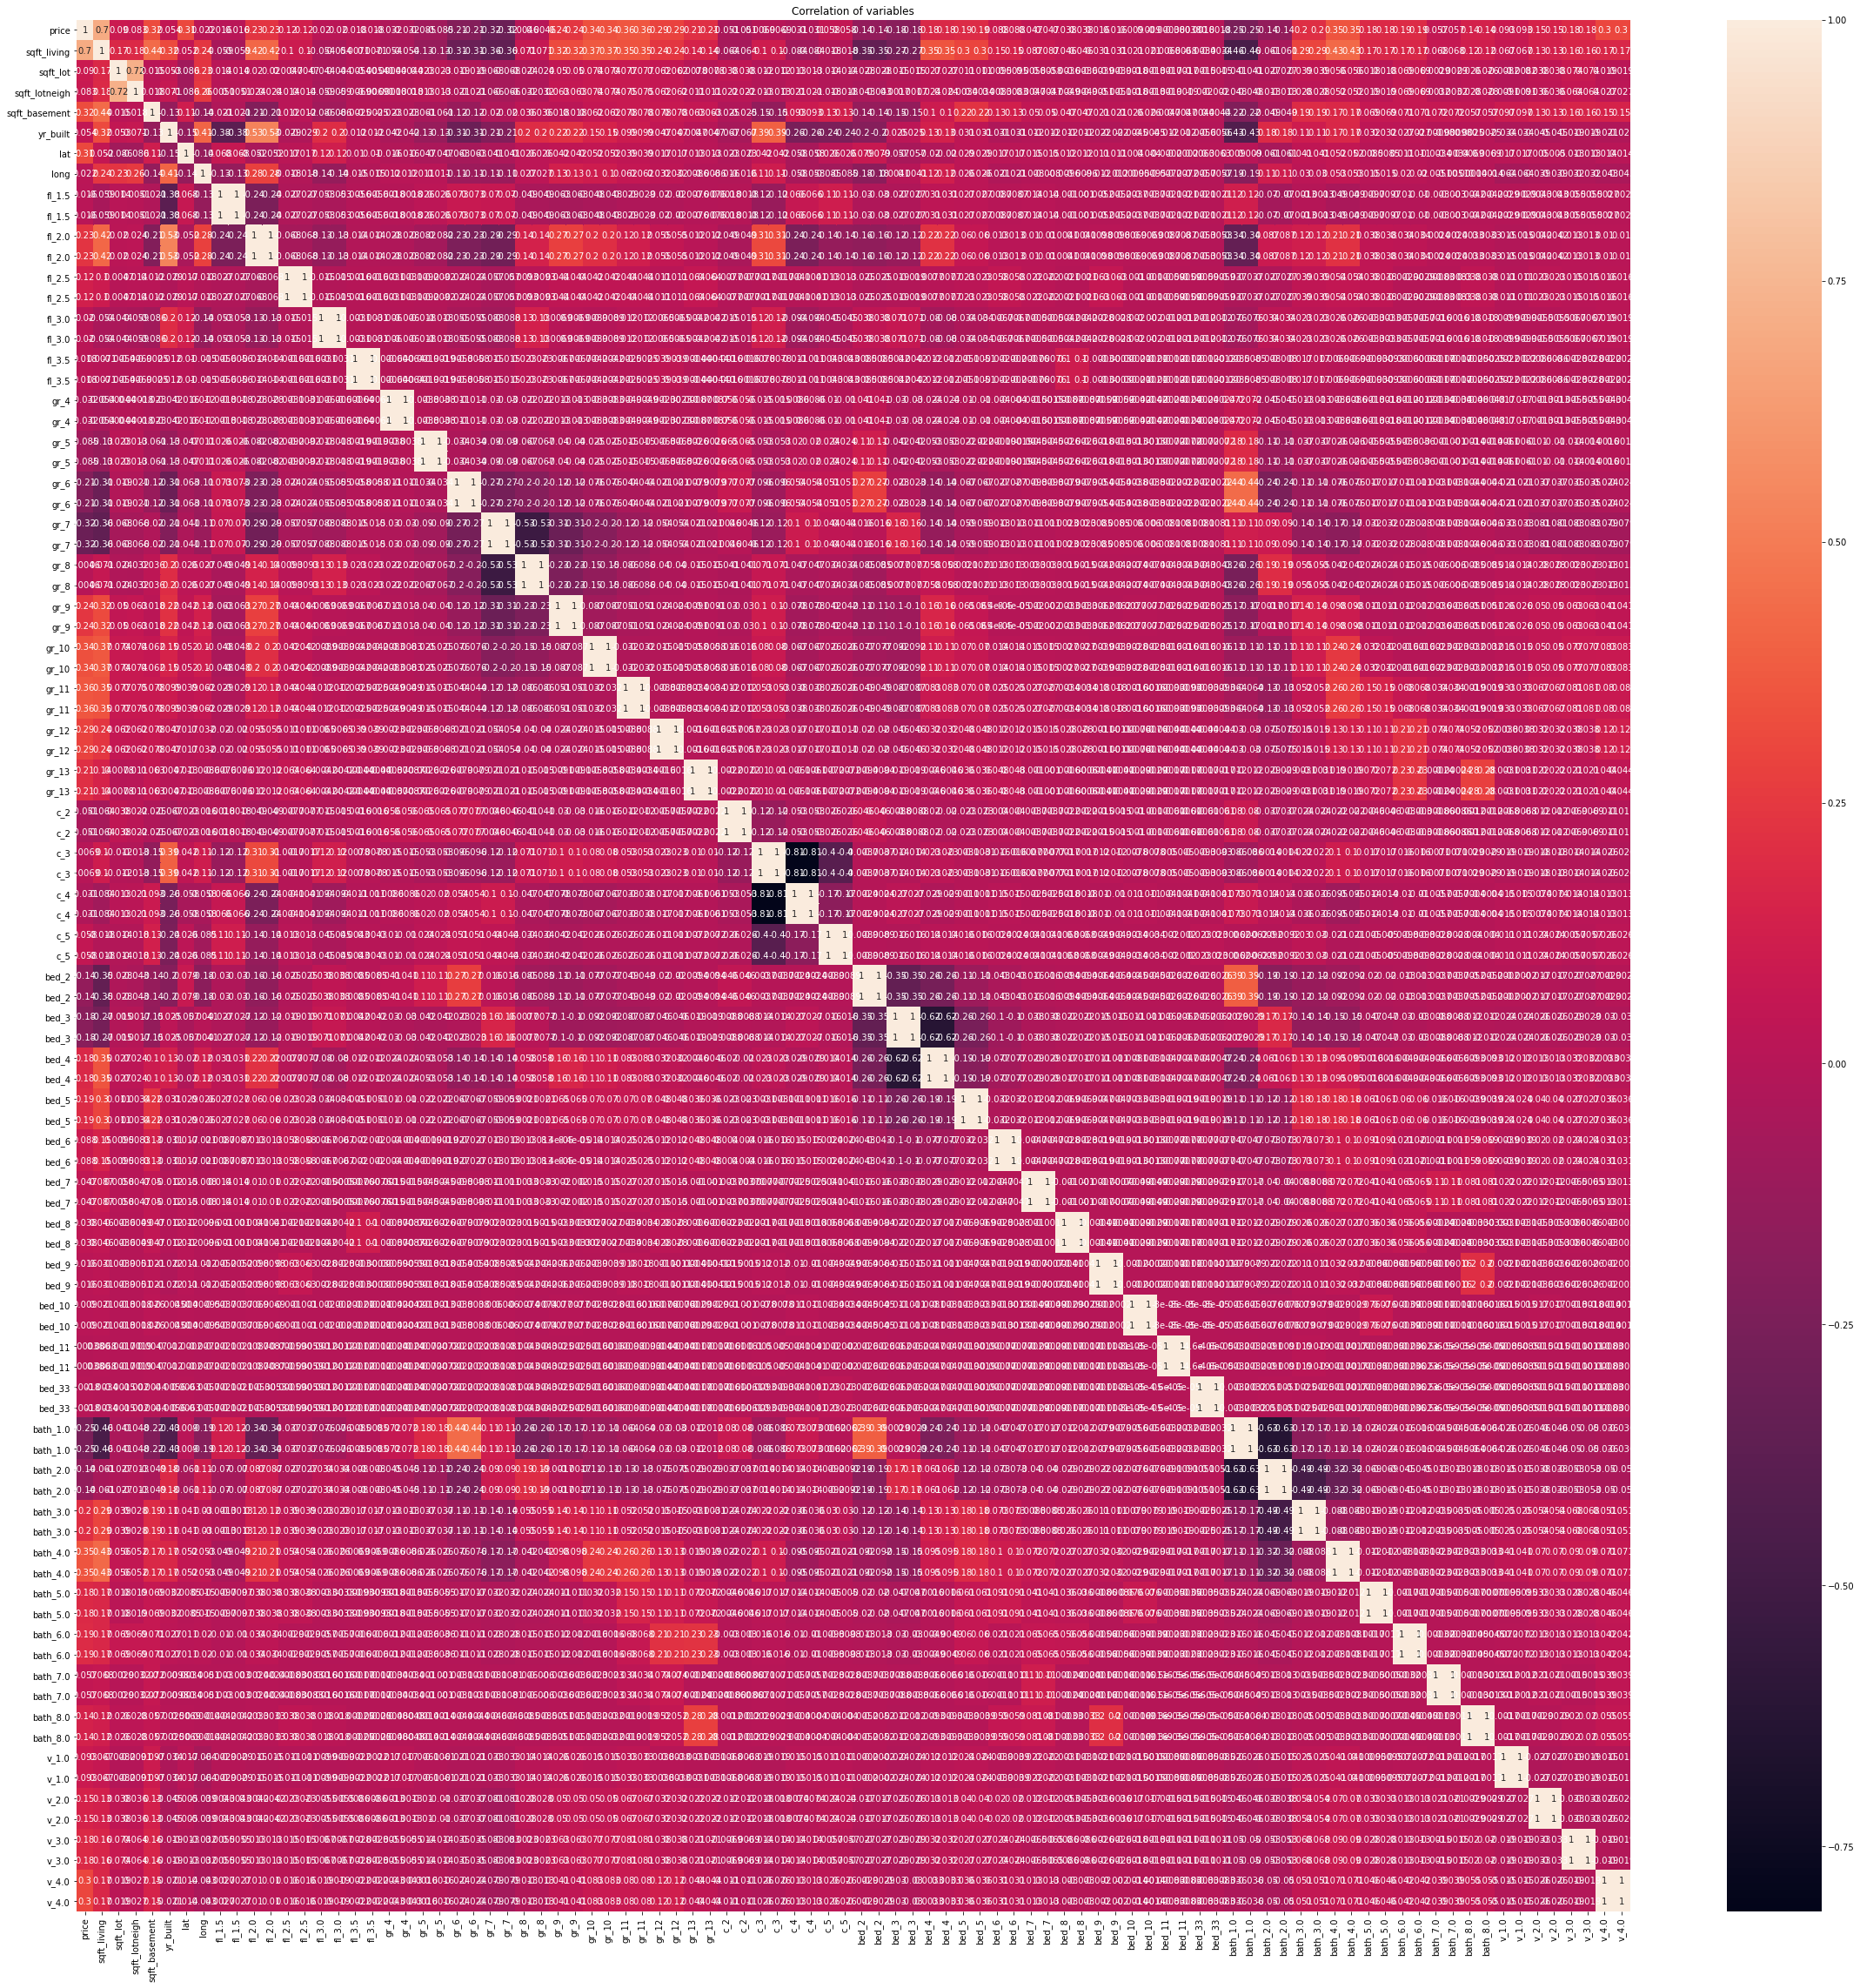

In [219]:
#Korrelationsanalyse
corr = immo_water_dum[['price','sqft_living','sqft_lot','sqft_lotneigh','sqft_basement','yr_built','lat','long','fl_1.5', 'fl_2.0', 'fl_2.5', 'fl_3.0', 'fl_3.5', 'gr_4', 'gr_5',
       'gr_6', 'gr_7', 'gr_8', 'gr_9', 'gr_10', 'gr_11', 'gr_12', 'gr_13',
       'c_2', 'c_3', 'c_4', 'c_5', 'bed_2', 'bed_3', 'bed_4', 'bed_5', 'bed_6',
       'bed_7', 'bed_8', 'bed_9', 'bed_10', 'bed_11', 'bed_33', 'bath_1.0',
       'bath_2.0', 'bath_3.0', 'bath_4.0', 'bath_5.0', 'bath_6.0', 'bath_7.0',
       'bath_8.0', 'v_1.0', 'v_2.0', 'v_3.0', 'v_4.0']]
plt.figure(figsize=(40,40))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,annot=True)

plt.show

# (7) Visualization

In [186]:
grade_bath = ['grade', 'bathrooms']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(immo_water[grade_bath[0]], immo_water[grade_bath[1]]).style.background_gradient(cmap = cm)
        

bathrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0
grade,,,,,,,
5,4,0,0,0,0,0,0
6,8,2,0,0,0,0,0
7,3,15,3,0,0,0,0
8,1,18,8,5,0,0,0
9,0,12,7,3,0,0,0
10,0,11,8,8,1,0,0
11,0,4,6,6,3,0,0
12,0,1,3,2,1,2,1


In [282]:
grade_bed = ['grade', 'bedrooms']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(immo_water[grade_bed[0]], immo_water[grade_bed[1]]).style.background_gradient(cmap = cm)
        

bedrooms,3,4,5,6
grade,,,,
6,1,2,0,0
7,6,6,0,1
8,13,5,7,1
9,10,5,2,0
10,14,11,3,0
11,7,6,4,1
12,3,2,3,1


In [283]:
bed_bath = ['bedrooms', 'bathrooms']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(immo_water[bed_bath[0]], immo_water[bed_bath[1]]).style.background_gradient(cmap = cm)
        

bathrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0
bedrooms,,,,,,,
3,0,27,20,7,0,0,0
4,3,15,10,8,1,0,0
5,0,5,1,8,3,1,1
6,0,0,1,1,1,1,0
